In [14]:
def LResult(name, var, digits=3):
    return r'${} = {} \approx {}$'.format(name, var, n(var, digits=digits))

### F21 ETSMP group assignment 3
Playing Dice
==========

In a certain dice game, a single die is rolled thrice and the total number of dots is counted. The stochastic variable X is defined as the sum of the three rolls. The die can be assumed to be fair.

## Excersise 1:
How many possibilities are there of $X$ being $3, 4, \dots, 18$?

Given three dice rolls, the sample space is the set of combinations of the possible die values $\{1, 2, \dots, 6\}$ with repeats. Since each die-roll doesn't affect the next, this is an ordered experiment with replacement, meaning that $|S| = 6^3$. 


In [15]:
S = tuples(range(1, 7), 3)
show('|S| = 6^3 = {}'.format(6^3))
len(S) == 6^3

'|S| = 6^3 = 216'

True

Now to figure out the number of possibilities to get each of the possible values of $X$, one could iterate over $S$, counting each time the relevant sum occurred:

In [16]:
X_pos = [0]*19  # Keeping 0-2 in the list makes it easier to access each sum by it's index
for e in S:
    X_pos[sum(e)] += 1
X_pos[3:]

[1, 3, 6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10, 6, 3, 1]

An alternative way of tackling this problem is asking how many possible integer compositions of length three  and a max element of 6 exist for each sum.

In [17]:
[Compositions(i, length=3, max_part=6).cardinality() for i in range(3, 19)]

[1, 3, 6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10, 6, 3, 1]

To calculate this a bit more theoretically, the binomial coefficient ${n-1,} \choose {k-1}$ determines the number of possible compositions of $n$ with length $k$ exist.

In [18]:
[binomial(i-1,2) for i in range(3, 19)]

[1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120, 136]

It is clear however that this doesn't quite describe the problem as the values start overshooting at the 9 value of 8. This is because at values 9 and above, compositions with values larger than 6 become possible.  
To improve this, it can be used that the set must be symmetrical, since dice have their opposite sides arranged so they always sum up to 7. Flipping each die in the one composition of sum 3 would therefore yield the one possible die arrangement that sums to 18, the three combinations yielding 4 can be flipped to 17 and so on.

In [19]:
X_pos = [binomial(i-1,2) for i in range(3, 11)]
X_pos = X_pos + list(reversed(X_pos))
X_pos

[1, 3, 6, 10, 15, 21, 28, 36, 36, 28, 21, 15, 10, 6, 3, 1]

This way, the only problematic values left are [9, 12], which can be manually corrected. For nine there is three possibilities too many, namely the possible permutations of (1, 1, 7). For ten, we get 9 possibilities too many, the three permutations of (1, 1, 8), plus the 6 permutations of (1, 2, 7). Eleven and twelve are then resolved by the symmetry mentioned above.

In [20]:
X_pos = [binomial(i-1,2) for i in range(3, 11)]
X_pos[9-3] -= 3
X_pos[10-3] -= 3 + 6
X_pos = X_pos + list(reversed(X_pos))
X_pos

[1, 3, 6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10, 6, 3, 1]

Which now matches the results from above.

## Exercise 2:
Write and plot the PMF $f(x)$ for $X$

Since the number of occurrences of each of the possible values of X has been calculated, the PMF being defined as the probability for each value of X:  
$$P_X(x_k) = P(X=x_k) \text{ for } k = 0, 1, 2, \dots, n \, \big| \, |R_X| = n$$  
Now since the number of possibilities for each value of X, and the total number of possibilities has been calculated, this can easily be calculated:  
$$P_X(x_k) = \frac{|\{X=x_k\}|}{|S|} $$

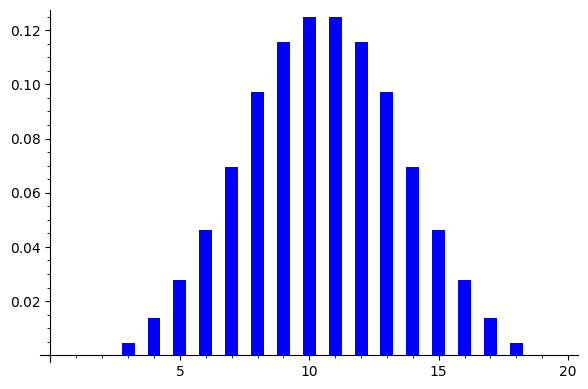

In [21]:
def pmf(x):
    if 3 <= x <= 18:
        return X_pos[x-3]/len(S)
    else:
        return 0
bar_chart([pmf(x) for x in range(20)])

## Exercise 3:
Write and plot the CDF $F(x) \text{ for } X$

Here the bins of the possibilities are added up, and the CDF will then be very similarly defined

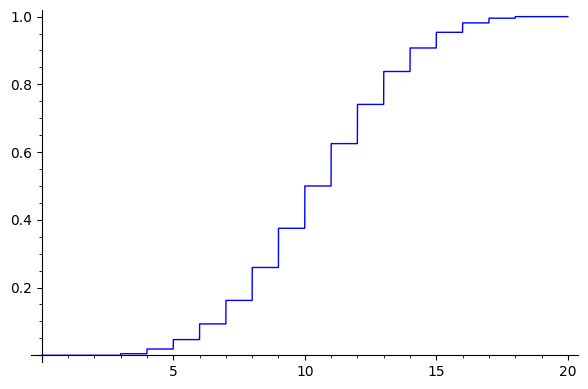

In [22]:
X_tot_pos = [sum(X_pos[0:i+1]) for i in range(len(X_pos))]
def cdf(x):
    if x < 3:
        return 0
    elif x <= 18:
        return X_tot_pos[floor(x)-3]/len(S)
    else:
        return 1
plot(cdf, (x, 0, 20))

## Exercise 4:
What's the probability of getting 8?

By definition the PMF gives the probability of a given outcome, and so this can be found by taking {{r'$f_X(8) = {} \approx {} $'.format(pmf(8), n(pmf(8), digits=2))}}

## Exercise 5:
What's the probability of getting at least 12?

The CDF is defined as the probability of X being less than or equal to a value.  
$$ F_X(x) = P(X \le x) \text{ for } X \in \Bbb R $$  
Combining this with the probability of the complement of the event  
$$ P(E^c) = 1 - P(E) $$  
The probability of getting a value greater than or equal to x can thus be defined as  
$$ P(X \ge x) = 1 - P(X \lt x) $$  
now since X is a discrete variable $X \lt x \Leftrightarrow X \le x-1$, which then leads us to  
$$P(X \ge x) = 1 - F_X(x-1)$$  
{{r'$$ P(X \ge 12) = 1 - F_X(11) = {} \approx {} $$'.format(1-cdf(11), n(1-cdf(11), digits=2))}}


## Exercise 6:
What's the probability of getting at least 9 and at most 15?

Here the fact that  
$$ P(a \lt X \le b) = F_X(b) - F_X(a) $$  
can be used, letting $a = 9-1$ to achieve the $\le$ relation desired:  
{{r'$$ P(9 \le X \le 15) = F_X(15) - F_X(8) = {} \approx {} $$'.format(cdf(15)-cdf(8), n(cdf(15)-cdf(8), digits=2))}}

## Exercise 7:
What's the probability of getting less than 4 or more than 16?

Since all values are disjoint events, and the two specified ranges aren't overlapping, the probability  
$$ P(X \lt 4 \lor X \gt 16) = P(X \lt 4) + P(X \gt 16) $$
Using the same methods as the previous two exercises, this can be formulated as follows  
{{ans = cdf(3) + 1 - cdf(16); r'$$ P(X \lt 4 \lor X \gt 16) = F_X(3) + 1 - F_X(16) = {} \approx {} $$'.format(ans, n(ans, digits=2))}}

## Exercise 8:
What's the average sum one can expect to get?

From the definition of the mean of a random variable  
$$ EX = \sum_{x_k \in R_X}{x_k P(X = x_k)} = \sum_{x_k \in R_X}{x_k P_X(x_k)} $$  
The mean $EX$ can be calculated as follows:

In [30]:
X_mean = sum([x * pmf(x) for x in range(3, 19)])

yielding {{LResult(r'\mu_X', X_mean)}}

## Exercise 9:
What's the variance $\sigma^2$ and standard deviation $\sigma$ of $X$? 

Using the definition of the variance  
$$ Var(X) = E\left[\left(X - \mu_X\right)^2\right] = E\left[X^2\right] - \mu_X^2 $$  
The variance can be calculated, and from that, the standard deviation:  
$$ SD(X) = \sqrt{Var(X)} $$

In [29]:
var_X = sum([x^2 * pmf(x) for x in range(3, 19)]) - X_mean^2
sd_X = sqrt(var_X)

Which computes to:  
{{LResult('Var(X)', var_X)}}  
{{LResult('SD(X)', sd_X)}} 

## Exercise 10:
What's the probability that the sum is within 1, 2, and 3 standard deviations of the mean?  

This can be expressed as  
$P \left( \mu_X - k \sigma_X \le X \le \mu_X + k \sigma_X \right) \text{ for } k \in [1, 2, 3] $  
or using the CDF:  
$F_X \left( \mu_X + k \sigma_X \right) - F_X \left( \mu_X - k \sigma_X - 1 \right) \text{ for } k \in [1, 2, 3] $  

In [33]:
p_k_sd = [cdf(X_mean + k * sd_X) - cdf(X_mean - k * sd_X - 1) for k in range(1, 4)]

{{ '<br>'.join([LResult(r'P_{ ' + str(k+1) + r' \sigma_X }', p_k_sd[k]) for k in range(len(p_k_sd))]) }}

## Exercise 11:
If the first roll is a six, what's the probability of the sum of the three rolls to be at least 12?

Let the value of the three individual rolls be called $X_1, X_2, X_3$, then the question can be formalized as:  
$$P(X \ge 12 \mid X_1 = 6) = \frac{P(X \ge 12 \cap X_1 = 6)}{P(X_1 = 6)} = \frac{\left| X \ge 12 \cap X_1 = 6 \right|}{\left|X_1 = 6\right|}$$  
Now the number of outcomes with a sum of at least twelve with the first roll being six, is the same as the number of combinations of two dice that sum to six.  
The total number of outcomes where the first roll is a six is just the number of possible rolls with the remaining two dice: $2^6$  
Using these two facts, the outcome can be calculated as: